# **SCM256 Project - Amazon Exploratory Data Analysis**

This notebook performs exploratory data analysis on Amazon Grocery & Gourmet Food Reviews dataset. The analysis includes:
1. Data cleaning and preprocessing
2. Basic statistical analysis
3. Temporal analysis of reviews
4. Text analysis and visualization
5. Sentiment distribution analysis

The final goal is to prepare the data for sentiment analysis using NLP techniques.

## Setting up the environment

We'll import necessary packages for data manipulation, visualization, and text processing.

### Import packages

In [1]:
#general purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import tensorflow as tf

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")

### Import data

Loading the Amazon reviews dataset from local storage.

In [2]:
df = pd.read_csv('C:\\Users\\k_pow\\OneDrive\\Documents\\MIT\\MITx SCM\\Spring 2025\\SCM256\\Project\\Amazon_Grocery_Gourmet_Food_Review_Data.csv')
#df = pd.read_csv('https://www.dropbox.com/scl/fo/n27f2piibmdl5twymhv29/AIOqG0xduoKp-V8O66ZKens?e=1&preview=Amazon_Grocery_Gourmet_Food_Review_Data.csv&rlkey=q4j2a14meio2q4oh6rtutjqlf&st=lsxmt684&dl=1')

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2575577605.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\k_pow\\OneDrive\\Documents\\MIT\\MITx SCM\\Spring 2025\\SCM256\\Project\\Amazon_Grocery_Gourmet_Food_Review_Data.csv')


## Data Exploration and Quality Analysis

We'll start by examining the dataset structure, checking for missing values, and understanding the basic characteristics of our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1048575 non-null  int64 
 1   verified        1048575 non-null  bool  
 2   reviewTime      1048575 non-null  object
 3   reviewerID      1048575 non-null  object
 4   asin            1048575 non-null  object
 5   reviewerName    1048328 non-null  object
 6   reviewText      1048217 non-null  object
 7   summary         1048384 non-null  object
 8   unixReviewTime  1048575 non-null  int64 
 9   vote            152536 non-null   object
 10  style           566012 non-null   object
 11  image           8570 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 89.0+ MB


In [4]:
df.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
1048570,1,True,"01 25, 2018",A3T46EPZQA8E68,B001EO615Y,Steve Boyar,Very sweet...so much so that unable to taste f...,Glac NOT!,1516838400,NaN,"{'Size:': ' 1', 'Flavor:': ' Marrons Glace'}",NaN
1048571,5,True,"06 11, 2016",A2FM36BFZO5AE2,B001EO5WUY,barbara yonkers,This is not a tea for everyone. Casual tea dri...,Only buy if you know how dragonwell tastes,1465603200,2.0,{'Package Quantity:': ' 1'},NaN
1048572,5,True,"03 7, 2016",A1OOLS3367Y7M4,B001EO5WUY,Chunker,It has a slight grassy flavor but not overpowe...,Good tea.,1457308800,NaN,{'Package Quantity:': ' 1'},NaN
1048573,5,True,"09 16, 2017",AIOSFMDY994AZ,B001EO5WVS,Commmaster,Tastes great,Five Stars,1505520000,NaN,NaN,NaN
1048574,1,True,"09 11, 2017",A1SP9TCTFDSX07,B001EO5WVS,Ed D.,"Had no flavor and at this price, I expected mu...",I expected much better. Save your,1505088000,NaN,NaN,NaN


In [5]:
print("DataFrame Shape:", df.shape)              # Rows x Columns
print("\nColumn Names:", df.columns)             # List column names
print("\nInfo:\n")
df.info()                                        # Detailed info (non-nulls, dtypes, etc.)
print("\nStatistical Description (Numeric Columns):\n", df.describe())

DataFrame Shape: (1048575, 12)

Column Names: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1048575 non-null  int64 
 1   verified        1048575 non-null  bool  
 2   reviewTime      1048575 non-null  object
 3   reviewerID      1048575 non-null  object
 4   asin            1048575 non-null  object
 5   reviewerName    1048328 non-null  object
 6   reviewText      1048217 non-null  object
 7   summary         1048384 non-null  object
 8   unixReviewTime  1048575 non-null  int64 
 9   vote            152536 non-null   object
 10  style           566012 non-null   object
 11  image           8570 non-null     object
d

In [ ]:
#remove duplicates
df = df.drop_duplicates()


Missing Values:
 overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          247
reviewText            358
summary               191
unixReviewTime          0
vote               896039
style              482563
image             1040005
dtype: int64


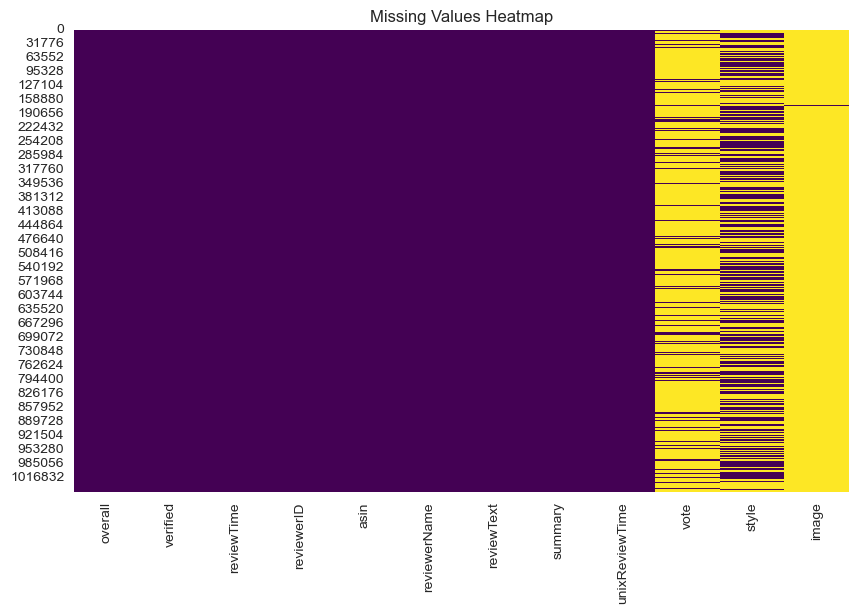

In [6]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize missingness with a heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Unique values in 'overall' (Ratings): [5 4 3 1 2]


C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2448817864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


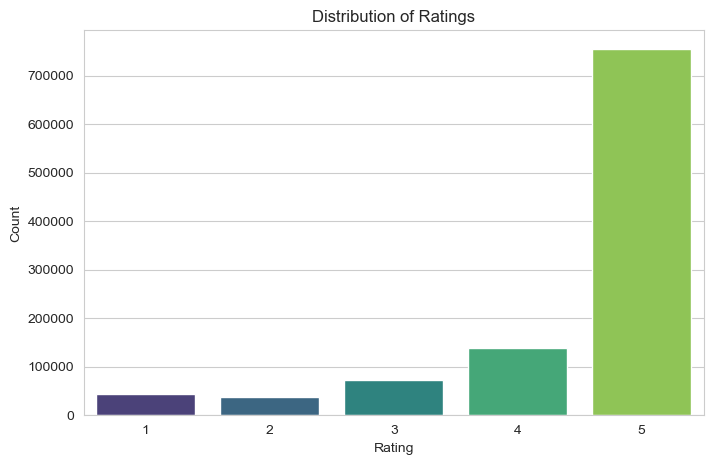

In [7]:
print("\nUnique values in 'overall' (Ratings):", df['overall'].unique())

# Countplot for the 'overall' column
plt.figure(figsize=(8,5))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Value Counts for 'verified':
 verified
True     908920
False    139655
Name: count, dtype: int64


C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\1121620199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verified', data=df, palette='viridis')


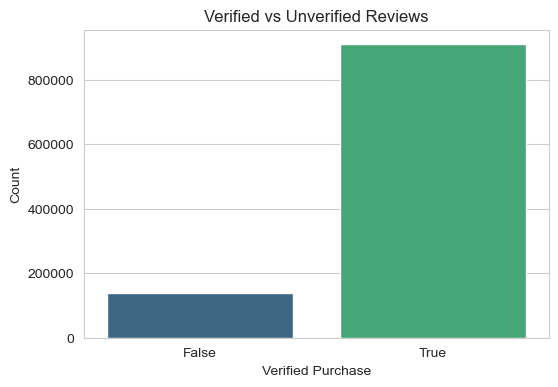

In [8]:
print("\nValue Counts for 'verified':\n", df['verified'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='verified', data=df, palette='viridis')
plt.title("Verified vs Unverified Reviews")
plt.xlabel("Verified Purchase")
plt.ylabel("Count")
plt.show()

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\1163819382.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['overall'].count().plot(figsize=(10,5))


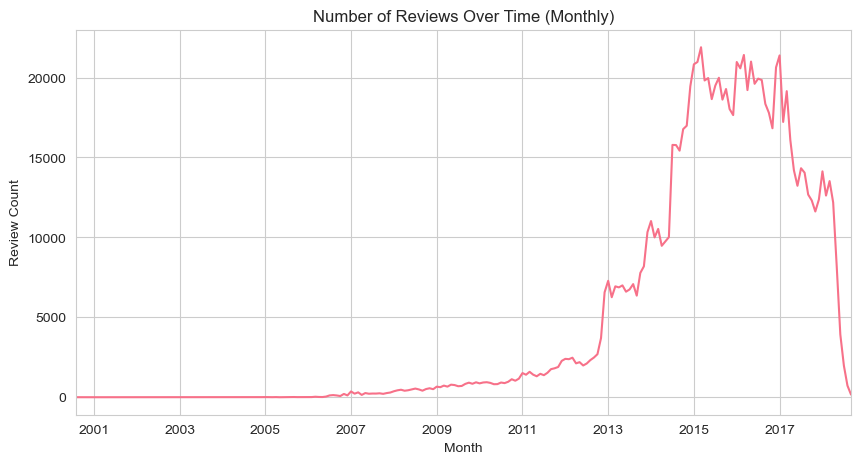

In [9]:
# Convert 'reviewTime' 
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Quick check of distribution over time 
df.set_index('reviewTime', inplace=True)  # set time index to facilitate time-series plots
df.resample('M')['overall'].count().plot(figsize=(10,5))
plt.title("Number of Reviews Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.show()

# Reset index if needed for further analysis
df.reset_index(inplace=True)


Word Count Stats:
 count    1.048575e+06
mean     3.915924e+01
std      5.959286e+01
min      1.000000e+00
25%      7.000000e+00
50%      2.100000e+01
75%      4.700000e+01
max      3.410000e+03
Name: word_count, dtype: float64


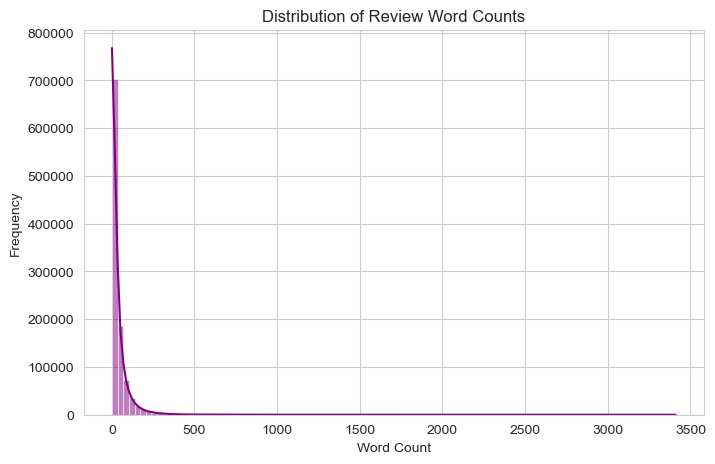

In [10]:
df['reviewText'] = df['reviewText'].astype(str)  # Ensure it's string type

# Number of words in each review
df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))
print("\nWord Count Stats:\n", df['word_count'].describe())

# Distribution of word counts
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=100, kde=True, color='purple')
plt.title("Distribution of Review Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Review Distribution Analysis

Let's analyze the distribution of reviews across different dimensions:
1. Rating distribution
2. Verified vs unverified purchases
3. Temporal patterns
4. Review length analysis

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2507496521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2507496521.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified', y='overall', data=df, palette='Set3')
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2507496521.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='word_count', data=df, palette='Set2')


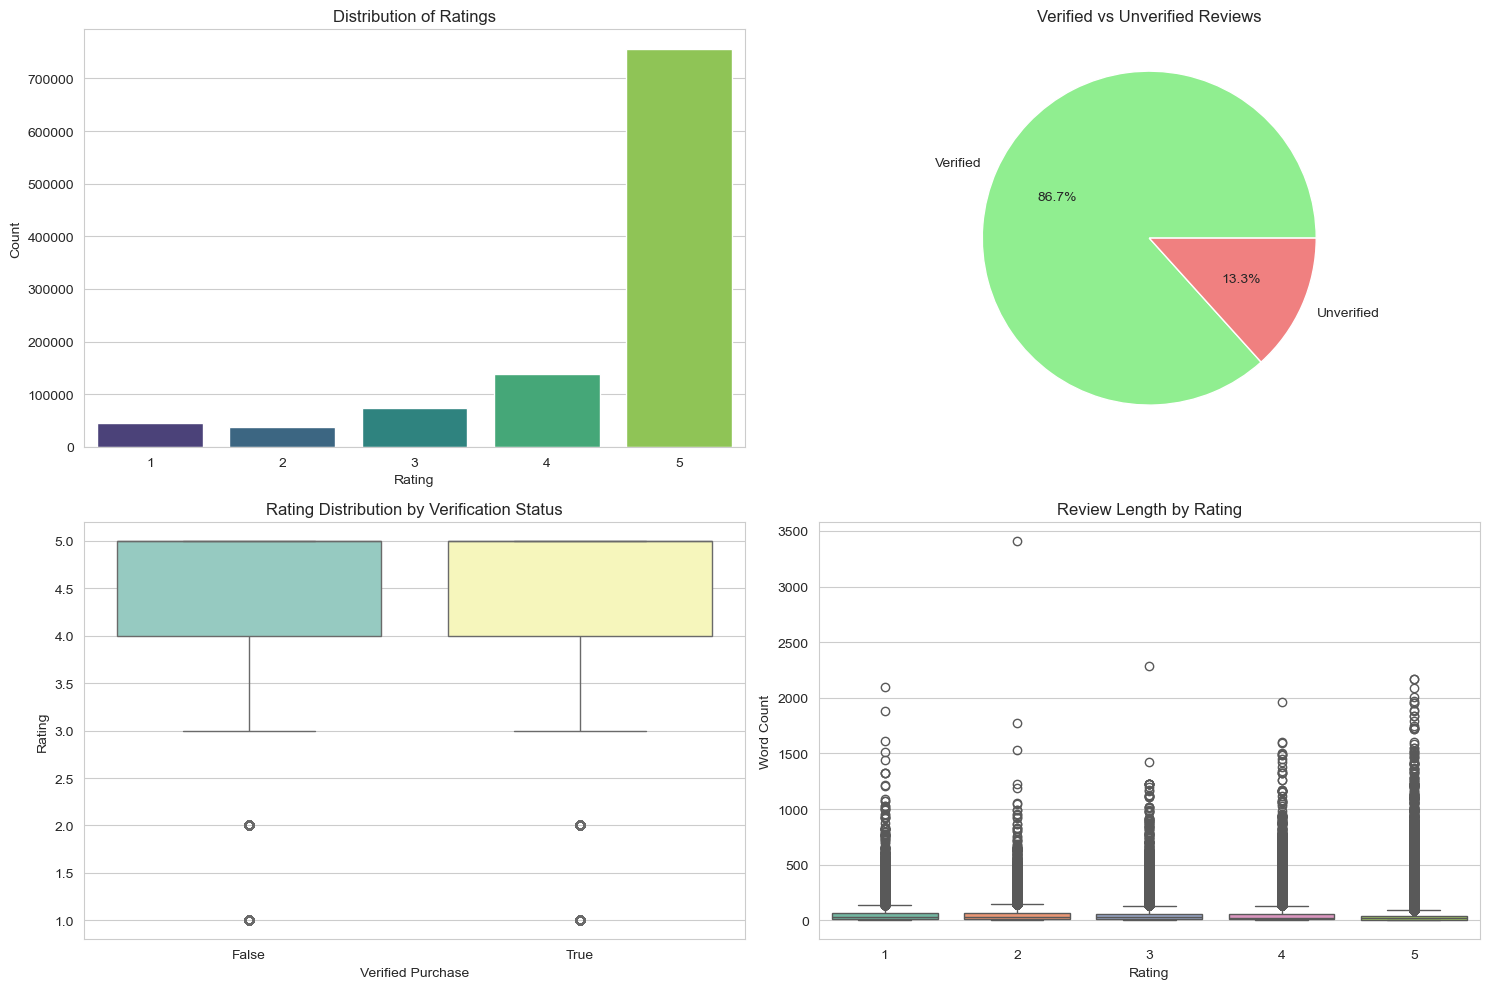

In [11]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# 1. Rating Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='overall', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# 2. Verified vs Unverified
plt.subplot(2, 2, 2)
verified_pct = df['verified'].value_counts(normalize=True) * 100
plt.pie(verified_pct, labels=['Verified', 'Unverified'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Verified vs Unverified Reviews")

# 3. Average Rating by Verification Status
plt.subplot(2, 2, 3)
sns.boxplot(x='verified', y='overall', data=df, palette='Set3')
plt.title("Rating Distribution by Verification Status")
plt.xlabel("Verified Purchase")
plt.ylabel("Rating")

# 4. Word Count vs Rating
plt.subplot(2, 2, 4)
sns.boxplot(x='overall', y='word_count', data=df, palette='Set2')
plt.title("Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")

plt.tight_layout()
plt.show()

## Temporal Analysis

Let's analyze how reviews and ratings change over time.

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\3351254506.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('reviewTime')['overall'].resample('M').count().plot()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\3351254506.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('reviewTime')['overall'].resample('M').mean().plot()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\3351254506.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  verified_ratio = df.set_index('reviewTime')['verified'].resample('M').mean()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\3351254506.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('reviewTime')['word_count'].resample('M').mean().plot()


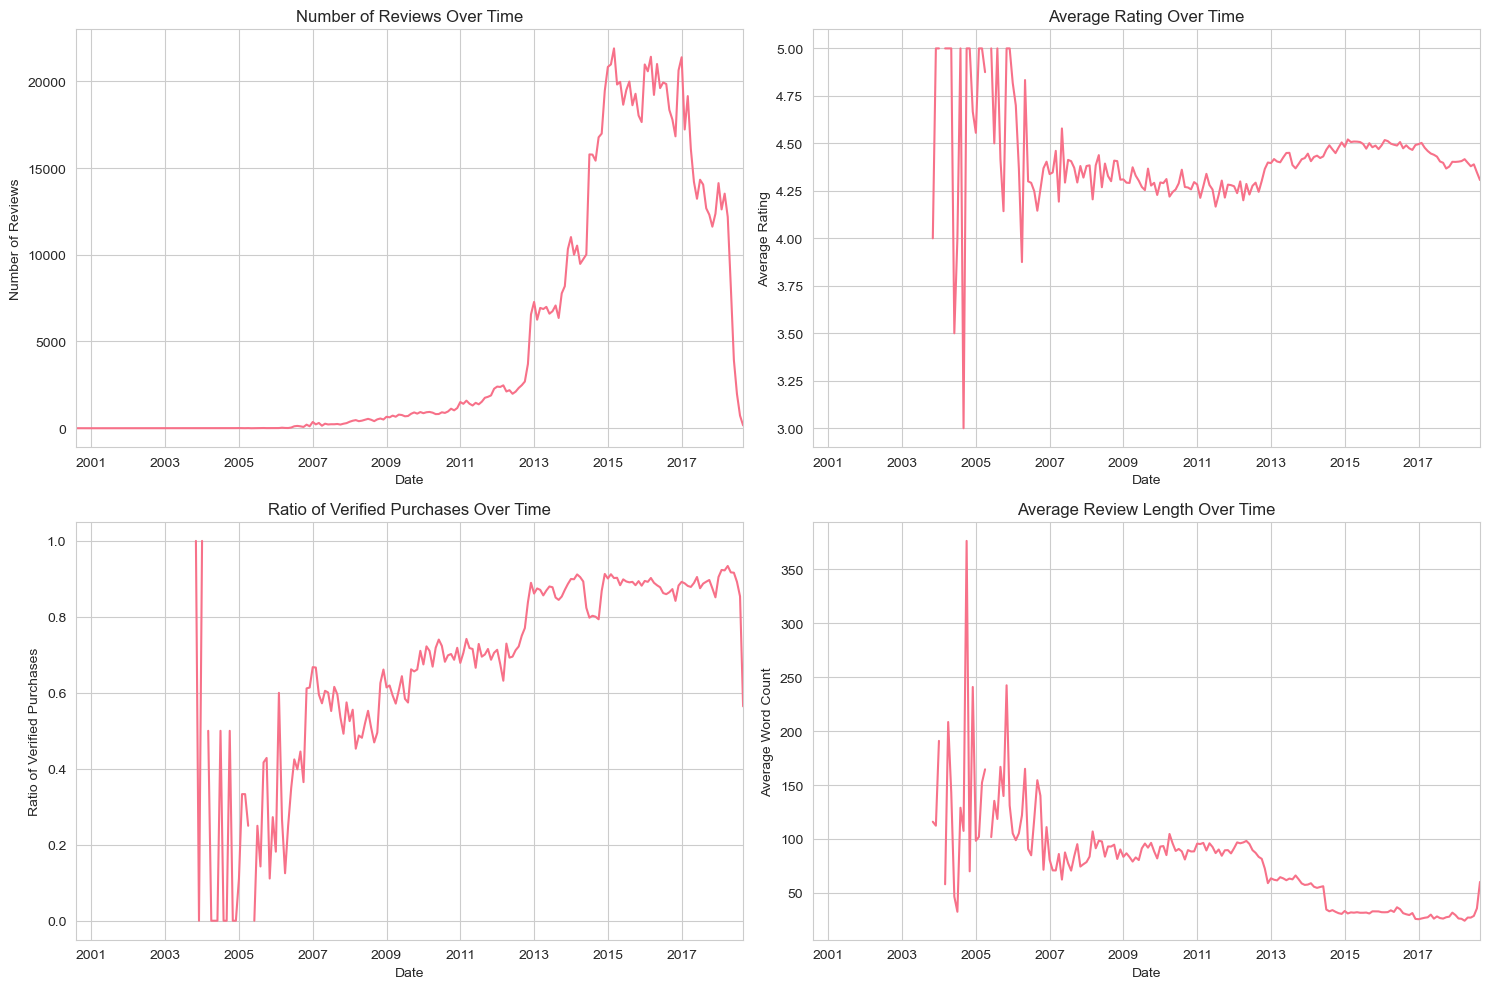

In [12]:
# Convert reviewTime to datetime if not already
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create multiple time-based visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Reviews per month
plt.subplot(2, 2, 1)
df.set_index('reviewTime')['overall'].resample('M').count().plot()
plt.title("Number of Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

# 2. Average rating over time
plt.subplot(2, 2, 2)
df.set_index('reviewTime')['overall'].resample('M').mean().plot()
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")

# 3. Verified purchase ratio over time
plt.subplot(2, 2, 3)
verified_ratio = df.set_index('reviewTime')['verified'].resample('M').mean()
verified_ratio.plot()
plt.title("Ratio of Verified Purchases Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio of Verified Purchases")

# 4. Average word count over time
plt.subplot(2, 2, 4)
df.set_index('reviewTime')['word_count'].resample('M').mean().plot()
plt.title("Average Review Length Over Time")
plt.xlabel("Date")
plt.ylabel("Average Word Count")

plt.tight_layout()
plt.show()

# Reset index
df.reset_index(drop=True, inplace=True)

## Text Analysis and Preprocessing

We'll now analyze the text content of reviews, including:
1. Word frequency analysis
2. Word clouds
3. Text preprocessing for sentiment analysis

In [21]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [14]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

Sample for faster processing... will have to batch (ssh into SuperCloud) for full dataset

In [15]:
df =df.sample(10000)

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # 2. Lowercase
    text = text.lower()
    # 3. Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # 4. Tokenize
    tokens = word_tokenize(text)
    # 5. Remove non-alphabetic tokens and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to reviewText
df['tokens'] = df['reviewText'].astype(str).apply(preprocess_text)
# Apply preprocessing to summary
df['summarytokens'] = df['summary'].astype(str).apply(preprocess_text)

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [18]:
# Flatten list of all tokens
review_tokens = [word for tokens in df['tokens'] for word in tokens]

In [19]:
# Frequency distribution
freq_dist = nltk.FreqDist(review_tokens)
common_words = freq_dist.most_common(20)
print("\nTop 20 Frequent Words in review:")
for word, freq in common_words:
    print(word, ":", freq)


Top 20 Frequent Words in review:
good : 3006
like : 2746
taste : 2702
great : 2564
flavor : 2314
love : 1962
product : 1646
one : 1599
coffee : 1562
tea : 1498
use : 1153
make : 1149
really : 1011
would : 953
price : 952
get : 924
much : 871
time : 865
buy : 819
sugar : 795


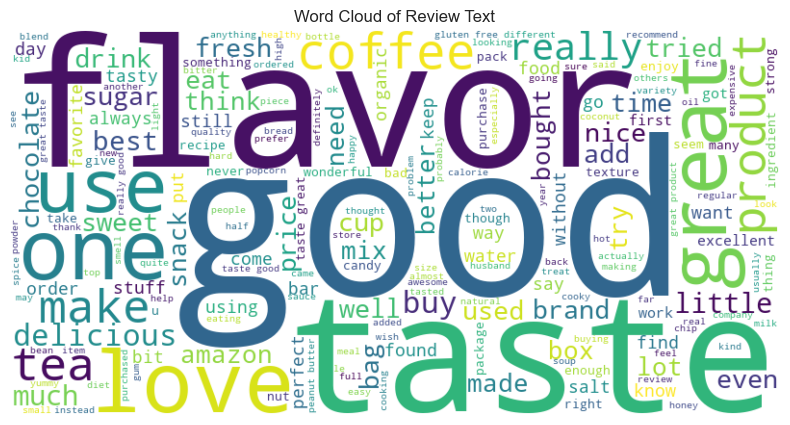

In [22]:
wordcloud_text = " ".join(review_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()

In [23]:
summary_tokens = [word for summarytokens in df['summarytokens'] for word in summarytokens]

In [24]:
# Frequency distribution
freq_dist = nltk.FreqDist(summary_tokens)
common_words = freq_dist.most_common(20)
print("\nTop 20 Frequent Words in review:")
for word, freq in common_words:
    print(word, ":", freq)


Top 20 Frequent Words in review:
star : 2551
five : 1996
great : 1133
good : 987
love : 507
taste : 474
best : 341
flavor : 339
like : 308
product : 307
coffee : 303
four : 274
tea : 264
delicious : 256
tasty : 200
one : 171
nice : 170
favorite : 166
excellent : 165
yummy : 165


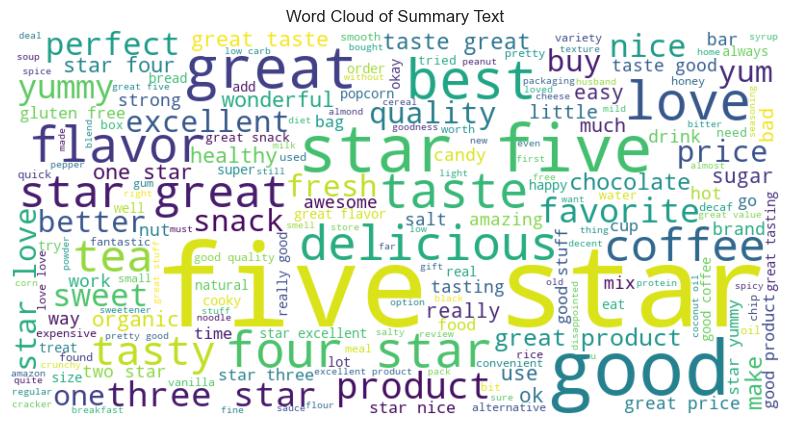

In [25]:
wordcloud_text = " ".join(summary_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Summary Text")
plt.show()

## Additional Text Analysis


Average Word Count by Rating:
overall
1    48.472554
2    51.082317
3    48.060606
4    50.217424
5    34.413398
Name: word_count, dtype: float64


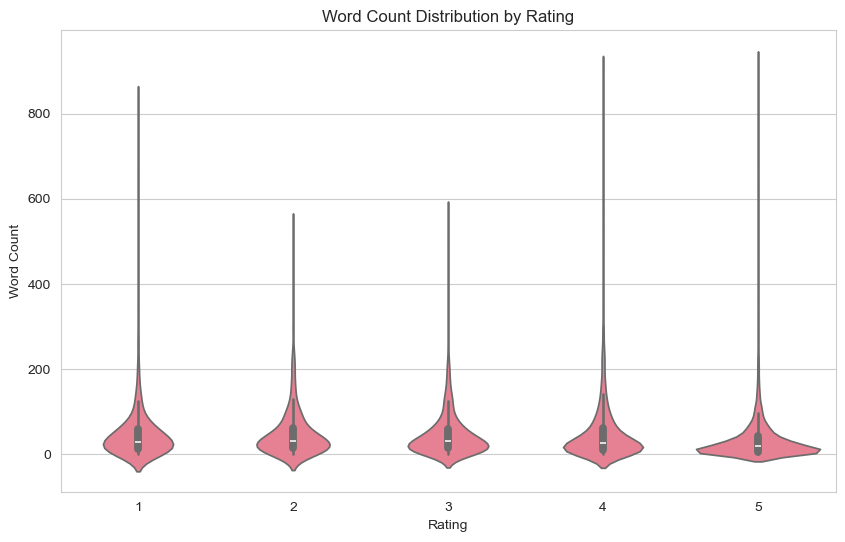

In [26]:
# Calculate average word count by rating
avg_words_by_rating = df.groupby('overall')['word_count'].mean()
print("\nAverage Word Count by Rating:")
print(avg_words_by_rating)

# Visualization of word count distribution by rating
plt.figure(figsize=(10, 6))
sns.violinplot(x='overall', y='word_count', data=df)
plt.title("Word Count Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

## Save Processed DataFrame

Save the preprocessed and tokenized dataframe for future sentiment analysis.

In [27]:
# Save the processed dataframe
processed_df = df[['overall', 'verified', 'reviewTime', 'tokens', 'summarytokens', 'word_count']]
processed_df.to_pickle('processed_reviews.pkl')
print("Processed dataframe saved as 'processed_reviews.pkl'")

Processed dataframe saved as 'processed_reviews.pkl'
